In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.optimize import curve_fit
from math import floor, ceil, log10
import pandas as pd
import codecs

# https://stackoverflow.com/questions/3410976/how-to-round-a-number-to-significant-figures-in-python
# https://stackoverflow.com/questions/23207055/rounding-errors-to-1-significant-figure-and-round-values-according-to-number-of
def round_to_n(data, n=1):
    if n != 1:
        return [round(x, -int(floor(log10(np.abs(x)))) + (n - 1)) for x in data]
    else:
        return [round(x, -int(floor(log10(np.abs(x))))) for x in data]

# returns data and error rounded to significance of error
def round_to_reference(data, ref, n):
    ref = round_to_n(ref, n)
    return ([round(x, -int(floor(log10(y))) + (n - 1)) for (x,y) in zip(data, ref)], ref)

rtn = round_to_n
rtr = round_to_reference

# Fit
def Kings_Law (x, const, m, B):
    y = const + m * (x-B)**4
    return y

# Returns flow velocity and uncertainty
def U_Düse_in_v(U):
    return (U*4.749, U*0.031)

label_size = 20
plt.rcParams.update({'font.size': label_size, 'legend.title_fontsize': 18, 'legend.fontsize': 18, "axes.labelsize": label_size, "xtick.labelsize": label_size, 
"ytick.labelsize": label_size, "axes.labelpad": 4, "lines.markersize": 10, "lines.linewidth": 2})


U=0.8: const, m, B
0.79 +/- 0.14, 3.6E+01 +/- 2.8, 0.573 +/- 0.016

U=1.0: const, m, B
0.93 +/- 0.14, 2.3E+01 +/- 2.0, 0.779 +/- 0.02

U=1.2: const, m, B
0.86 +/- 0.12, 1.0E+01 +/- 0.71, 0.898 +/- 0.02


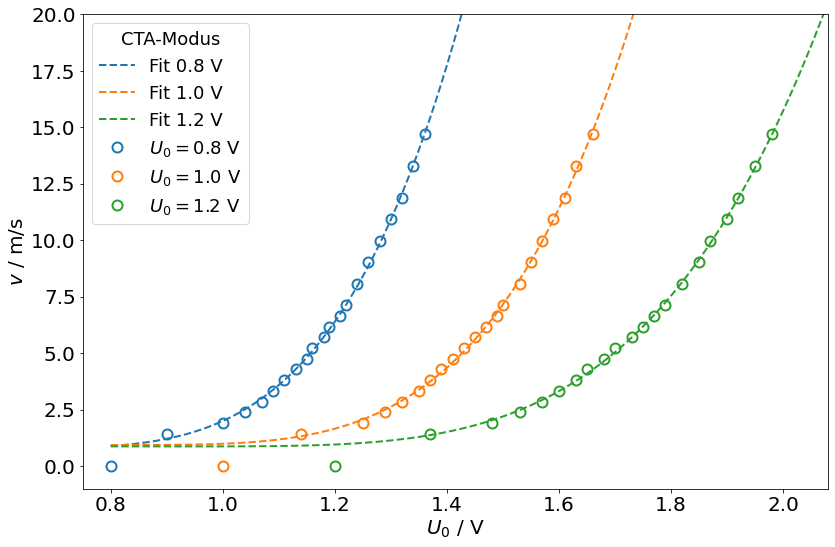

In [24]:
U = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
(v, delta_v) = U_Düse_in_v(U)
U_0_0_8 = np.array([0.8, 0.9, 1.0, 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.30, 1.32, 1.34, 1.36])
U_0_1_0 = np.array([1.0, 1.14, 1.25, 1.29, 1.32, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.50, 1.53, 1.55, 1.57, 1.59, 1.61, 1.63, 1.66])
U_0_1_2 = np.array([1.2, 1.37, 1.48, 1.53, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.77, 1.79, 1.82, 1.85, 1.87, 1.90, 1.92, 1.95, 1.98])

# U_0_0_8 = U_0_0_8-0.8
# U_0_1_0 = U_0_1_0-1
# U_0_1_2 = U_0_1_2-1.2
U_total = np.arange(U_0_0_8[0],3,0.01)


fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_0_0_8, U_0_1_0, U_0_1_2], [0.8, 1.0, 1.2])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V")
ax.set_ylim(bottom=-1, top=20)
ax.set_xlim(left=0.75, right=U_0_1_2[-1]+0.1)
ax.legend(title="CTA-Modus")
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_3_CTA.png")

### CTA Verschoben


U=0.8: const, m, B
0.79 +/- 0.14, 3.6E+01 +/- 2.8, -0.227 +/- 0.016

U=1.0: const, m, B
0.93 +/- 0.14, 2.3E+01 +/- 2.0, -0.221 +/- 0.02

U=1.2: const, m, B
0.86 +/- 0.12, 1.0E+01 +/- 0.71, -0.302 +/- 0.02


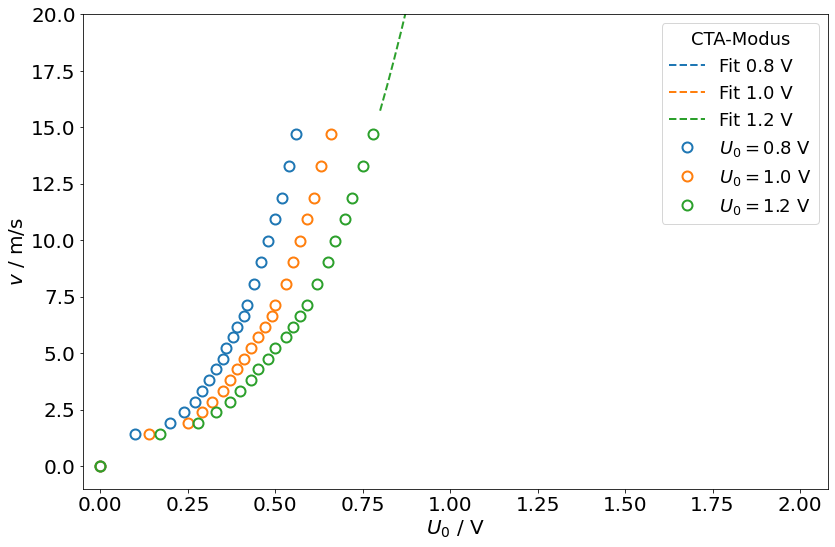

In [26]:
U = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1])
(v, delta_v) = U_Düse_in_v(U)
U_0_0_8 = np.array([0.8, 0.9, 1.0, 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18, 1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.30, 1.32, 1.34, 1.36])
U_0_1_0 = np.array([1.0, 1.14, 1.25, 1.29, 1.32, 1.35, 1.37, 1.39, 1.41, 1.43, 1.45, 1.47, 1.49, 1.50, 1.53, 1.55, 1.57, 1.59, 1.61, 1.63, 1.66])
U_0_1_2 = np.array([1.2, 1.37, 1.48, 1.53, 1.57, 1.60, 1.63, 1.65, 1.68, 1.70, 1.73, 1.75, 1.77, 1.79, 1.82, 1.85, 1.87, 1.90, 1.92, 1.95, 1.98])

# Moved
U_0_0_8_m = U_0_0_8-0.8
U_0_1_0_m = U_0_1_0-1
U_0_1_2_m = U_0_1_2-1.2
U_total = np.arange(U_0_0_8[0],3,0.01)


fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_0_0_8_m, U_0_1_0_m, U_0_1_2_m], [0.8, 1.0, 1.2])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V")
ax.set_ylim(bottom=-1, top=20)
ax.set_xlim(left=-0.05, right=U_0_1_2[-1]+0.1)
ax.legend(title="CTA-Modus")
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_3_CTA_verschoben.png")

### Fit-Parameter Daten CTA

In [27]:
U_0 = [0.8, 1.0, 1.2]
data_dict = {"$U_0 / \mathrm{V}$": U_0, "$\mathrm{const} / \\frac{m}{s}$": const_vec, "$\Delta \mathrm{const} / \\frac{m}{s}$": delta_const_vec,
             "$m / \\frac{m}{sV^4}$": m_vec,  "$\Delta m / \\frac{m}{sV^4}$": delta_m_vec,  "$B / \mathrm{V}$": B_vec, "$\Delta B / \mathrm{V}$": delta_B_vec,
}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
caption = r"Parameter und Fehler für den Fit in Abb. \ref{fig:Fahrrad_CTA} des Fahrradglühdrahtes mit Gl. (\ref{eq:Kings_Law}) im CTA Modus."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_Fit_Parameter", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA_Fit_Parameter.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_Fit_Parameter", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{Parameter und Fehler für den Fit in Abb. \ref{fig:Fahrrad_CTA} des Fahrradglühdrahtes mit Gl. (\ref{eq:Kings_Law}) im CTA Modus.}
\label{tab:Fahrrad_CTA_Fit_Parameter}
\begin{tabular}{lllllll}
\toprule
$U_0 / \mathrm{V}$ & $\mathrm{const} / \frac{m}{s}$ & $\Delta \mathrm{const} / \frac{m}{s}$ & $m / \frac{m}{sV^4}$ & $\Delta m / \frac{m}{sV^4}$ & $B / \mathrm{V}$ & $\Delta B / \mathrm{V}$ \\
\midrule
               0.8 &                           0.79 &                                  0.14 &              3.6E+01 &                     2.8E+00 &           -0.227 &                   0.016 \\
                 1 &                           0.93 &                                  0.14 &              2.3E+01 &                     2.0E+00 &           -0.221 &                    0.02 \\
               1.2 &                           0.86 &                                  0.12 &              1.0E+01 &                     7.1E-01 &           -0.302 &           

### Messdaten

In [28]:
data_dict = {"$U / \mathrm{V}$": U, "$U_{0,0.8} / \mathrm{V}$": U_0_0_8, "$U_{0,1.0} / \mathrm{V}$": U_0_1_0, "$U_{0,1.2} / \mathrm{V}$": U_0_1_2}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
# caption = r"Messdaten zum im CTA-Modus betriebenen ISA Chrom 60 Heizdraht-Anemometer aus Kap. \ref{Kap:Heizdraht-Anemometer}. Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,8}=\SI{8}{V},U_{0,10}=\SI{10}{V}$ und $U_{0,12}=\SI{12}{V}$ bei der Düsenspannung $U$, um die Schaltung abzugleichen. Aufgrund der maximalen Spannungsversorgung können für einige Spannungen $U$ die Versorgespannungen $U_0$ nicht weiter erhöht werden."
caption = r"???"
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{???}
\label{tab:Fahrrad_CTA}
\begin{tabular}{rrrr}
\toprule
 $U / \mathrm{V}$ &  $U_{0,0.8} / \mathrm{V}$ &  $U_{0,1.0} / \mathrm{V}$ &  $U_{0,1.2} / \mathrm{V}$ \\
\midrule
              0.0 &                      0.80 &                      1.00 &                      1.20 \\
              0.3 &                      0.90 &                      1.14 &                      1.37 \\
              0.4 &                      1.00 &                      1.25 &                      1.48 \\
              0.5 &                      1.04 &                      1.29 &                      1.53 \\
              0.6 &                      1.07 &                      1.32 &                      1.57 \\
              0.7 &                      1.09 &                      1.35 &                      1.60 \\
              0.8 &                      1.11 &                      1.37 &                      1.63 \\
              0.9 &                      1.13 &          

### CCA Modus


U=0.8: const, m, B
1.72 +/- 0.13, 1.9E-02 +/- 0.002, -3.11 +/- 0.13


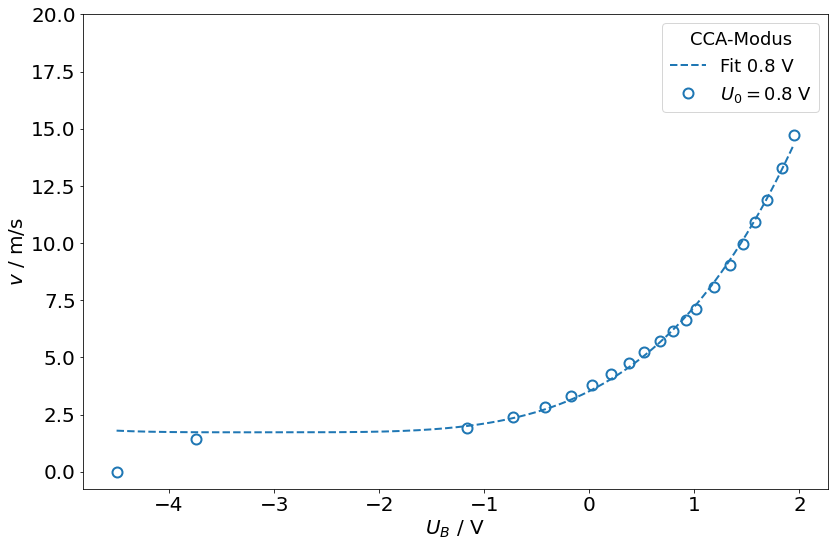

In [29]:
(v, delta_v) = U_Düse_in_v(U)
U_B = np.array([4.5, 3.74, 1.16, 0.73, 0.42, 0.17, -0.03, -0.21, -0.38, -0.52, -0.67, -0.80, -0.92, -1.02, -1.19, -1.34, -1.46, -1.58, -1.69, -1.83, -1.95])
U_B = U_B *-1
# U_total = np.arange(U_B[-1], U_B[0], 0.01)
U_total = np.arange(U_B[0], U_B[-1], 0.01)


fig, ax = plt.subplots(1,1, figsize=(12,8))

const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, VOLT) in enumerate(zip([U_B], [0.8])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"$U_0 = {VOLT}$ V", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [2, 0.1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {VOLT} V"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)

label="Fit"
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_B$ / V")
ax.set_ylim(top=20)
ax.legend(title="CCA-Modus")
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_3_CCA_alleine.png")

### CCA Daten

In [30]:
U_0 = ["0.8"]
data_dict = {"$U_0 / \mathrm{V}$": U_0, "$\mathrm{const} / \\frac{m}{s}$": const_vec, "$\Delta \mathrm{const} / \\frac{m}{s}$": delta_const_vec,
             "$m / \\frac{m}{sV^4}$": m_vec,  "$\Delta m / \\frac{m}{sV^4}$": delta_m_vec,  "$B / \mathrm{V}$": B_vec, "$\Delta B / \mathrm{V}$": delta_B_vec,
}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
caption = r"Parameter und Fehler für den Fit in Abb. \ref{fig:Fahrrad_CCA} mit Gl. (\ref{eq:Kings_Law}) für den Fahrradglühdraht im CCA Modus."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CCA_Fit_Parameter", caption=caption))
with codecs.open("Tabellen/Fahrrad_CCA_Fit_Parameter.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CCA_Fit_Parameter", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{Parameter und Fehler für den Fit in Abb. \ref{fig:Fahrrad_CCA} mit Gl. (\ref{eq:Kings_Law}) für den Fahrradglühdraht im CCA Modus.}
\label{tab:Fahrrad_CCA_Fit_Parameter}
\begin{tabular}{lllllll}
\toprule
$U_0 / \mathrm{V}$ & $\mathrm{const} / \frac{m}{s}$ & $\Delta \mathrm{const} / \frac{m}{s}$ & $m / \frac{m}{sV^4}$ & $\Delta m / \frac{m}{sV^4}$ & $B / \mathrm{V}$ & $\Delta B / \mathrm{V}$ \\
\midrule
               0.8 &                           1.72 &                                  0.13 &              1.9E-02 &                     2.0E-03 &            -3.11 &                    0.13 \\
\bottomrule
\end{tabular}
\end{table}



### Alle Daten

In [37]:
data_dict = {"$U / \mathrm{V}$": U, "$U_{0,0.8} / \mathrm{V}$": U_0_0_8, "$U_{0,1.0} / \mathrm{V}$": U_0_1_0, "$U_{0,1.2} / \mathrm{V}$": U_0_1_2, "$U_B / \mathrm{V}$": U_B}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()
caption = r"Messdaten für den Fahrradglühdraht aus Kap. \ref{Kap:Fahrradglühdraht}. Links: CTA Modus, Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,0.8}=\SI{0.8}{V},U_{0,1.0}=\SI{1.0}{V}$ und $U_{0,1.2}=\SI{1.2}{V}$. Die Schaltung wird für die Düsenspannung $U$ mit $U_0$ abgeglichen ($U_B=\SI{0}{V}$). Rechts: CCA Modus, Messung der verstärkten Brückenspannung $U_B$ bei konstanter Versorgespannung $U_0=\SI{0.8}{V}$."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA_CCA.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{Messdaten für den Fahrradglühdraht aus Kap. \ref{Kap:Fahrradglühdraht}. Links: CTA Modus, Änderung der Versorgespannung $U_0$ für verschiedene Ausgangsspannungen $U_{0,0.8}=\SI{0.8}{V},U_{0,1.0}=\SI{1.0}{V}$ und $U_{0,1.2}=\SI{1.2}{V}$. Die Schaltung wird für die Düsenspannung $U$ mit $U_0$ abgeglichen ($U_B=\SI{0}{V}$). Rechts: CCA Modus, Messung der verstärkten Brückenspannung $U_B$ bei konstanter Versorgespannung $U_0=\SI{0.8}{V}$.}
\label{tab:Fahrrad_CTA_CCA}
\begin{tabular}{rrrrr}
\toprule
 $U / \mathrm{V}$ &  $U_{0,0.8} / \mathrm{V}$ &  $U_{0,1.0} / \mathrm{V}$ &  $U_{0,1.2} / \mathrm{V}$ &  $U_B / \mathrm{V}$ \\
\midrule
              0.0 &                      0.80 &                      1.00 &                      1.20 &               -4.50 \\
              0.3 &                      0.90 &                      1.14 &                      1.37 &               -3.74 \\
              0.4 &                      1.00 &                      1.25 & 

### Vergleich CTA CCA


U=0.8: const, m, B
0.79 +/- 0.14, 1.2E+02 +/- 9.7, 0.421 +/- 0.012

U=0.8: const, m, B
1.72 +/- 0.13, 3.3E+01 +/- 3.5, 0.216 +/- 0.021

U=0.8: const, m, B
0.79 +/- 0.14, 3.6E+00 +/- 0.28, -0.405 +/- 0.029


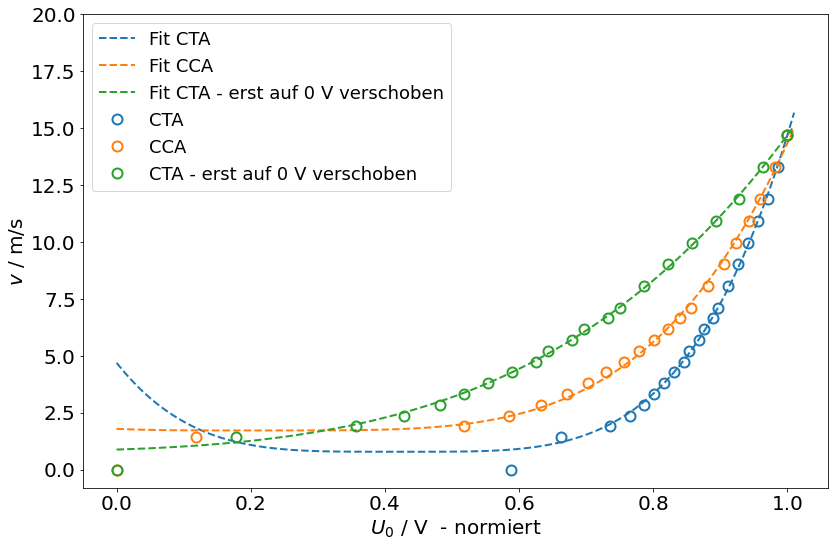

In [49]:
# Wichtig was man nimmt: _m sind die auf "0" verschobenen/moved Daten
U_0_0_8_norm_m = U_0_0_8_m/np.max(U_0_0_8_m) 
U_0_0_8_norm = U_0_0_8/np.max(U_0_0_8) 

# U_0_0_8_norm = (U_0_0_8-U_0_0_8[0])/np.max(U_0_0_8-U_0_0_8[0]) 

U_B_norm = (U_B-U_B[0])/np.max(U_B-U_B[0])
# U_B_norm = -U_B/(-np.max(U_0_12)) 
# U_B_norm = (U_B)/np.max(U_B)
# U_B_norm = (U_B+10)/np.max(U_B+10)
# U_B_norm = np.abs(U_B)/np.max(np.abs(U_B))

U_total = np.arange(0, 1.02, 0.01)        

fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

for i, (data, modus) in enumerate(zip([U_0_0_8_norm, U_B_norm, U_0_0_8_norm_m], ["CTA", "CCA", "CTA - erst auf 0 V verschoben",])):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"{modus}", c=f"C{i}", fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle="none", markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {modus}"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = "--", c=f"C{i}", label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V  - normiert")
ax.set_ylim(top=20)
ax.legend()#
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_2_CTA_CCA_Vergleich.png")

In [47]:
U_0 = ["CTA", "CCA", "CTA - verschoben"]
data_dict = {"$U_0 / \mathrm{V}$": U_0, "$\mathrm{const} / \\frac{m}{s}$": const_vec, "$\Delta \mathrm{const} / \\frac{m}{s}$": delta_const_vec,
             "$m / \\frac{m}{sV^4}$": m_vec,  "$\Delta m / \\frac{m}{sV^4}$": delta_m_vec,  "$B / \mathrm{V}$": B_vec, "$\Delta B / \mathrm{V}$": delta_B_vec,
}
# From index because columns are not the same size: First orient in rows, so only columns are missing, which in no problem and then transpose the dataframe
df = pd.DataFrame.from_dict(data = data_dict, orient="index").transpose()

caption = r"Vergleich der Fitparameter für Gl. (\ref{eq:Kings_Law}) für die normierten Spannungen im CTA und CCA Modus des Fahrradglühdrahtes. Für \enquote{CTA - verschoben} wurden die Daten vor der Normierung wie im CCA Modus erst auf $U_0 = \SI{0}{V}$ verschoben."
print(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA_norm_Fit_Parameter", caption=caption))
with codecs.open("Tabellen/Fahrrad_CTA_CCA_norm_Fit_Parameter.txt", "wb", "utf-8") as file:
    file.write(df.to_latex(index=False, escape=False, label="tab:Fahrrad_CTA_CCA_norm_Fit_Parameter", caption=caption, na_rep=""))

\begin{table}
\centering
\caption{Vergleich der Fitparameter für Gl. (\ref{eq:Kings_Law}) für die normierten Spannungen im CTA und CCA Modus des Fahrradglühdrahtes. Für \enquote{CTA - verschoben} wurden die Daten vor der Normierung wie im CCA Modus erst auf $U_0 = \SI{0}{V}$ verschoben.}
\label{tab:Fahrrad_CTA_CCA_norm_Fit_Parameter}
\begin{tabular}{lllllll}
\toprule
$U_0 / \mathrm{V}$ & $\mathrm{const} / \frac{m}{s}$ & $\Delta \mathrm{const} / \frac{m}{s}$ & $m / \frac{m}{sV^4}$ & $\Delta m / \frac{m}{sV^4}$ & $B / \mathrm{V}$ & $\Delta B / \mathrm{V}$ \\
\midrule
               CTA &                           0.79 &                                  0.14 &              1.2E+02 &                     9.7E+00 &            0.421 &                   0.012 \\
               CCA &                           1.72 &                                  0.13 &              3.3E+01 &                     3.5E+00 &            0.216 &                   0.021 \\
  CTA - verschoben &                      

### CCA und verschobene CTA von Fahrrad und Chrom Draht

In [79]:
# Wichtig was man nimmt: _m sind die auf "0" verschobenen/moved Daten
# CTA
U_0_12 = np.array([12.05, 12.2, 14.5, 15.2, 15.6, 16, 16.2, 16.5, 16.7, 16.9, 17, 17.25, 17.65, 18.1, 18.5, 19.1, 19.3, 19.8, 19.9])
# Gleichen Geschwindigkeitsbereich untersuchen
len_data = min([len(U_0_0_8_m), len(U_0_12)])
U_0_0_8_m, U_0_12 = U_0_0_8_m[0:len_data], U_0_12[0:len_data]
U_0_0_8_norm_m = U_0_0_8_m/np.max(U_0_0_8_m) 
U_0_12_norm_m = (U_0_12-U_0_12[0])/np.max(U_0_12-U_0_12[0]) 

# CCA
U_B_chrom = np.array([4.32, 4.15, 2.77, 2.4, 2.21, 2.07, 1.92, 1.8, 1.67, 1.59, 1.48, 1.39, 1.31, 1.23, 1.12, 1.04, 0.95, 0.92, 0.86, 0.79, 0.73, 0.67, 0.63])*(-1)
# Gleichen Geschwindigkeitsbereich untersuchen
len_data = min([len(U_B), len(U_B_chrom)])
U_B, U_B_chrom = U_B[0:len_data], U_B_chrom[0:len_data]
U_B_norm = (U_B-U_B[0])/np.max(U_B-U_B[0])
U_B_norm_chrom = (U_B_chrom-U_B_chrom[0])/np.max(U_B_chrom-U_B_chrom[0])


U = np.array([0, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 1.9, 2.1, 2.3, 2.5, 2.8, 3.1, 3.4, 3.7])
(v, delta_v) = U_Düse_in_v(U)


U=0.8: const, m, B
0.19 +/- 0.63, 7.8E-01 +/- 0.28, -0.96 +/- 0.2

U=0.8: const, m, B
0.79 +/- 0.16, 2.7E+00 +/- 0.29, -0.434 +/- 0.042


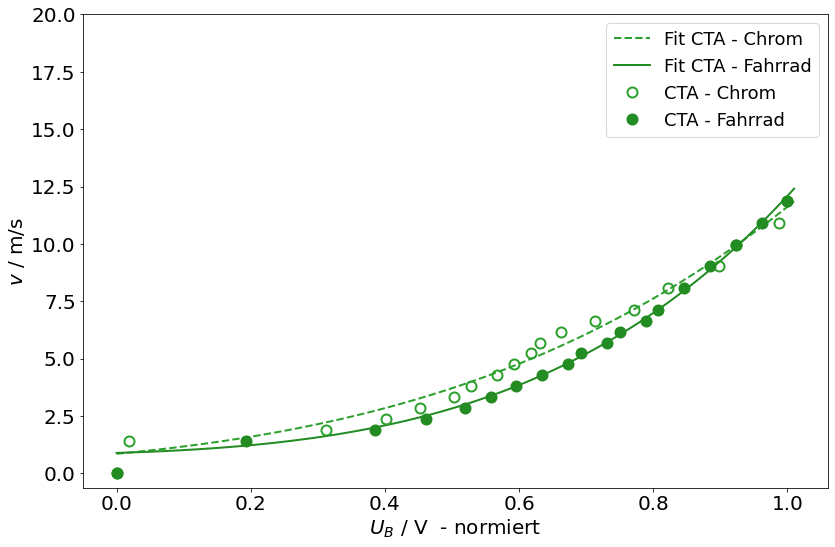

In [80]:
U_total = np.arange(0, 1.02, 0.01)        

fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

data_array = [U_0_12_norm_m, U_0_0_8_norm_m]
legend_array = ["CTA - Chrom", "CTA - Fahrrad"]
linestyle_array = ["--", "-"]
color_array = ["C2", "forestgreen"]
fillstyle_array = ["none", "full"]
for i, (data, modus, ls, c, fs) in enumerate(zip(data_array, legend_array, linestyle_array, color_array, fillstyle_array)):
    ax.errorbar(data, v[0:len(data)], zorder=3, label =f"{modus}", c=c, fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle=fs, markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {modus}"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = ls, c=c, label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_B$ / V  - normiert")
ax.set_ylim(top=20)
ax.legend()#
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_2_Cross_CTA_CTA_Vergleich.png")


U=0.8: const, m, B
2.03 +/- 0.26, 2.9E+01 +/- 6.8, 0.203 +/- 0.047

U=0.8: const, m, B
1.72 +/- 0.13, 3.3E+01 +/- 3.5, 0.216 +/- 0.021


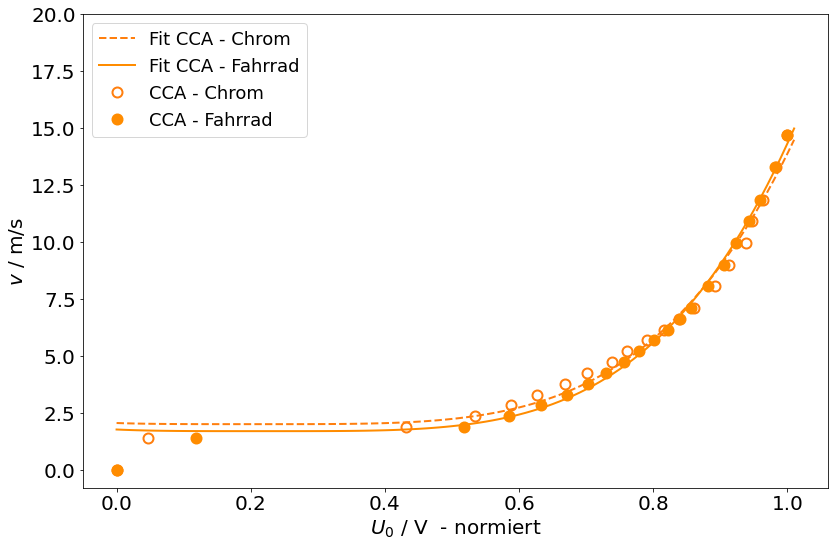

In [81]:
U_total = np.arange(0, 1.02, 0.01)        

fig, ax = plt.subplots(1,1,figsize=(12,8))
const_vec, m_vec, B_vec = [], [], []
delta_const_vec, delta_m_vec, delta_B_vec = [], [], []

data_array = [U_B_norm_chrom, U_B_norm]
legend_array = ["CCA - Chrom", "CCA - Fahrrad"]
linestyle_array = ["--", "-"]
color_array = ["C1", "darkorange"]
fillstyle_array = ["none", "full"]
for i, (data, modus, ls, c, fs) in enumerate(zip(data_array, legend_array, linestyle_array, color_array, fillstyle_array)):
    ax.errorbar(data[0:len_data], v[0:len_data], zorder=3, label =f"{modus}", c=c, fmt="o", ecolor="C3", elinewidth=4, capsize=6, fillstyle=fs, markeredgewidth=2)

    guess = [0, 1, 0]
    parameters, covariance = curve_fit(Kings_Law, data[1:], v[1:len(data)], p0=guess)
    std_error = np.sqrt(np.diag(covariance))
    fit_y = Kings_Law(U_total, *parameters)

    print(f"\nU={VOLT}: const, m, B")
    ((const, m, B), (delta_const, delta_m, delta_B)) = rtr(parameters, std_error, 2)
    print(f"{const} +/- {delta_const}, {m:.1E} +/- {delta_m}, {B} +/- {delta_B}")
    const_vec.append(const), m_vec.append(f"{m:.1E}"), B_vec.append(B), delta_const_vec.append(delta_const), delta_m_vec.append(f"{delta_m:.1E}"), delta_B_vec.append(delta_B)

    label=f"Fit {modus}"
    # label=f"$v(U_0)=({{{const}}} \\frac{{m}}{{s}} + {{{m:.1E}}})\ \\cdot (U_0 - {{{B}}} V) \\frac{{m}}{{sV^4}}$"
    ax.plot(U_total, fit_y, ls = ls, c=c, label=label, zorder=2)
ax.set_ylabel("$v$ / m/s")
ax.set_xlabel("$U_0$ / V  - normiert")
ax.set_ylim(top=20)
ax.legend()#
plt.tight_layout()
plt.savefig("Abb/Fahrrad_3_2_Cross_CCA_CCA_Vergleich.png")

In [34]:
U_0_0_8_norm

array([0.58823529, 0.66176471, 0.73529412, 0.76470588, 0.78676471,
       0.80147059, 0.81617647, 0.83088235, 0.84558824, 0.85294118,
       0.86764706, 0.875     , 0.88970588, 0.89705882, 0.91176471,
       0.92647059, 0.94117647, 0.95588235, 0.97058824, 0.98529412,
       1.        ])

In [35]:
U_0_0_8

array([0.8 , 0.9 , 1.  , 1.04, 1.07, 1.09, 1.11, 1.13, 1.15, 1.16, 1.18,
       1.19, 1.21, 1.22, 1.24, 1.26, 1.28, 1.3 , 1.32, 1.34, 1.36])